# DEAM数据集加载和探索

**目标：**
1. 测试DEAM数据集加载功能
2. 探索音频文件和标注数据
3. 可视化音频波形和情感标注
4. 验证数据完整性

**日期：** 2025年10月29日  
**Week 1 任务**


## 1. 导入必要的库


In [2]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 设置绘图风格
plt.style.use('default')
sns.set_palette("husl")

print("✅ 所有库导入成功！")
print(f"Librosa版本: {librosa.__version__}")
print(f"Pandas版本: {pd.__version__}")


✅ 所有库导入成功！
Librosa版本: 0.11.0
Pandas版本: 2.2.3


## 2. 设置数据集路径


In [3]:
# 数据集路径
DEAM_ROOT = Path("../data/DEAM")
AUDIO_DIR = DEAM_ROOT / "DEAM_audio" / "MEMD_audio"
ANNOTATION_DIR = DEAM_ROOT / "DEAM_Annotations" / "annotations"

# 验证路径存在
print("=" * 60)
print("数据集路径验证")
print("=" * 60)
print(f"DEAM根目录: {DEAM_ROOT.exists()} - {DEAM_ROOT}")
print(f"音频目录: {AUDIO_DIR.exists()} - {AUDIO_DIR}")
print(f"标注目录: {ANNOTATION_DIR.exists()} - {ANNOTATION_DIR}")

# 统计文件数量
if AUDIO_DIR.exists():
    audio_files = list(AUDIO_DIR.glob("*.mp3"))
    print(f"\n音频文件数量: {len(audio_files)}")
    print(f"示例文件: {audio_files[0].name if audio_files else 'N/A'}")


数据集路径验证
DEAM根目录: True - ..\data\DEAM
音频目录: True - ..\data\DEAM\DEAM_audio\MEMD_audio
标注目录: True - ..\data\DEAM\DEAM_Annotations\annotations

音频文件数量: 1802
示例文件: 10.mp3


## 3. 加载歌曲级别标注数据


In [4]:
# Load song-level static annotations
song_level_dir = ANNOTATION_DIR / "annotations averaged per song" / "song_level"

# Read two CSV files
df1 = pd.read_csv(song_level_dir / "static_annotations_averaged_songs_1_2000.csv")
df2 = pd.read_csv(song_level_dir / "static_annotations_averaged_songs_2000_2058.csv")

# Merge data
df_songs = pd.concat([df1, df2], ignore_index=True)

# 🔧 Clean column names (remove spaces)
df_songs.columns = df_songs.columns.str.strip()

# 🔧 Set song_id as index
df_songs = df_songs.set_index('song_id')

print("=" * 60)
print("Song-Level Annotation Data")
print("=" * 60)
print(f"Total Songs: {len(df_songs)}")
print(f"\nColumn Names: {list(df_songs.columns)}")
print(f"\nData Shape: {df_songs.shape}")
print(f"\nFirst 5 Rows:")
df_songs.head()


Song-Level Annotation Data
Total Songs: 1802

Column Names: ['valence_mean', 'valence_std', 'arousal_mean', 'arousal_std', 'valence_ max_mean', 'valence_max_std', 'valence_min_mean', 'valence_min_std', 'arousal_max_mean', 'arousal_max_std', 'arousal_min_mean', 'arousal_min_std']

Data Shape: (1802, 12)

First 5 Rows:


,valence_mean,valence_std,arousal_mean,arousal_std,valence_ max_mean,valence_max_std,valence_min_mean,valence_min_std,arousal_max_mean,arousal_max_std,arousal_min_mean,arousal_min_std
song_id,,,,,,,,,,,,
2,3.1,0.94,3.0,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.5,1.75,3.3,1.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.7,1.42,5.5,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.4,2.01,5.3,1.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.8,1.47,6.4,1.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. 数据统计和分布


Valence and Arousal Statistics
       valence_mean  arousal_mean
count   1802.000000   1802.000000
mean       4.904145      4.814029
std        1.174240      1.282187
min        1.600000      1.600000
25%        4.100000      3.800000
50%        4.900000      4.900000
75%        5.800000      5.800000
max        8.400000      8.100000


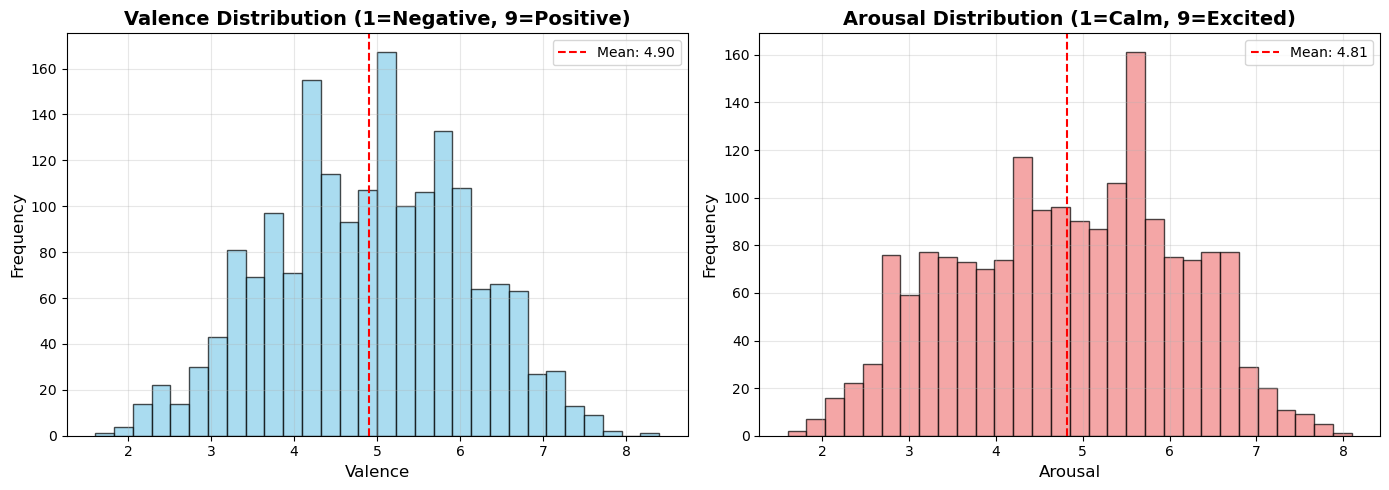

In [5]:
# Basic statistics
print("=" * 60)
print("Valence and Arousal Statistics")
print("=" * 60)
print(df_songs[['valence_mean', 'arousal_mean']].describe())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Valence distribution
axes[0].hist(df_songs['valence_mean'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df_songs['valence_mean'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df_songs["valence_mean"].mean():.2f}')
axes[0].set_xlabel('Valence', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Valence Distribution (1=Negative, 9=Positive)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Arousal distribution
axes[1].hist(df_songs['arousal_mean'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].axvline(df_songs['arousal_mean'].mean(), color='red', linestyle='--',
                label=f'Mean: {df_songs["arousal_mean"].mean():.2f}')
axes[1].set_xlabel('Arousal', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Arousal Distribution (1=Calm, 9=Excited)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Valence-Arousal二维空间分布


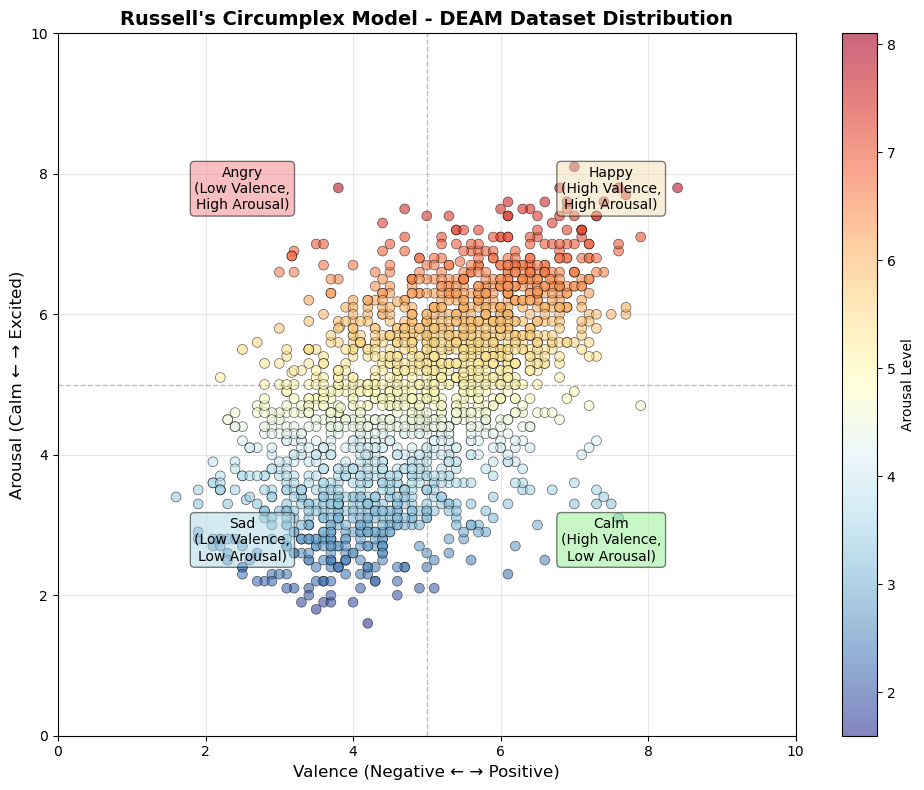


Dataset Coverage:
Valence Range: [1.60, 8.40]
Arousal Range: [1.60, 8.10]


In [6]:
# Plot Valence-Arousal 2D scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df_songs['valence_mean'], 
                     df_songs['arousal_mean'],
                     c=df_songs['arousal_mean'],
                     cmap='RdYlBu_r',
                     alpha=0.6,
                     s=50,
                     edgecolors='black',
                     linewidth=0.5)

# Add center lines
ax.axhline(y=5, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.axvline(x=5, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Add quadrant labels
ax.text(7.5, 7.5, 'Happy\n(High Valence,\nHigh Arousal)', 
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax.text(2.5, 7.5, 'Angry\n(Low Valence,\nHigh Arousal)', 
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
ax.text(2.5, 2.5, 'Sad\n(Low Valence,\nLow Arousal)', 
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
ax.text(7.5, 2.5, 'Calm\n(High Valence,\nLow Arousal)', 
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

ax.set_xlabel('Valence (Negative ← → Positive)', fontsize=12)
ax.set_ylabel('Arousal (Calm ← → Excited)', fontsize=12)
ax.set_title('Russell\'s Circumplex Model - DEAM Dataset Distribution', fontsize=14, fontweight='bold')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.grid(alpha=0.3)

plt.colorbar(scatter, ax=ax, label='Arousal Level')
plt.tight_layout()
plt.show()

print(f"\nDataset Coverage:")
print(f"Valence Range: [{df_songs['valence_mean'].min():.2f}, {df_songs['valence_mean'].max():.2f}]")
print(f"Arousal Range: [{df_songs['arousal_mean'].min():.2f}, {df_songs['arousal_mean'].max():.2f}]")


### 🔍 Helper: Find Available Audio Files

Run this cell to see which songs have both annotations AND audio files:


In [7]:
# Check which songs have both annotations and audio files
available_songs = []
missing_audio = []

print("🔍 Checking audio file availability...")
for song_id in df_songs.index:
    audio_path = AUDIO_DIR / f"{song_id}.mp3"
    if audio_path.exists():
        available_songs.append(song_id)
    else:
        missing_audio.append(song_id)

print(f"\n✅ Songs with both annotation AND audio: {len(available_songs)}/{len(df_songs)}")
print(f"❌ Songs with annotation but NO audio: {len(missing_audio)}")

print(f"\n📋 First 20 available songs: {available_songs[:20]}")
if missing_audio:
    print(f"\n⚠️  First 10 missing songs: {missing_audio[:10]}")
    
# Save available songs for easy access
print(f"\n💡 Tip: Use one of these song_ids: {available_songs[:10]}")


🔍 Checking audio file availability...

✅ Songs with both annotation AND audio: 1802/1802
❌ Songs with annotation but NO audio: 0

📋 First 20 available songs: [2, 3, 4, 5, 7, 8, 10, 12, 13, 17, 18, 19, 20, 21, 22, 24, 25, 31, 32, 35]

💡 Tip: Use one of these song_ids: [2, 3, 4, 5, 7, 8, 10, 12, 13, 17]


## 6. 加载和可视化音频文件


🎵 Loading Audio File: 7.mp3
✅ Audio Loaded Successfully!
   Sample Rate: 22050 Hz
   Audio Length: 993595 samples
   Duration: 45.06 seconds
   Data Type: float32
   Value Range: [-0.856, 0.936]

📊 Generating visualizations for Song 7...


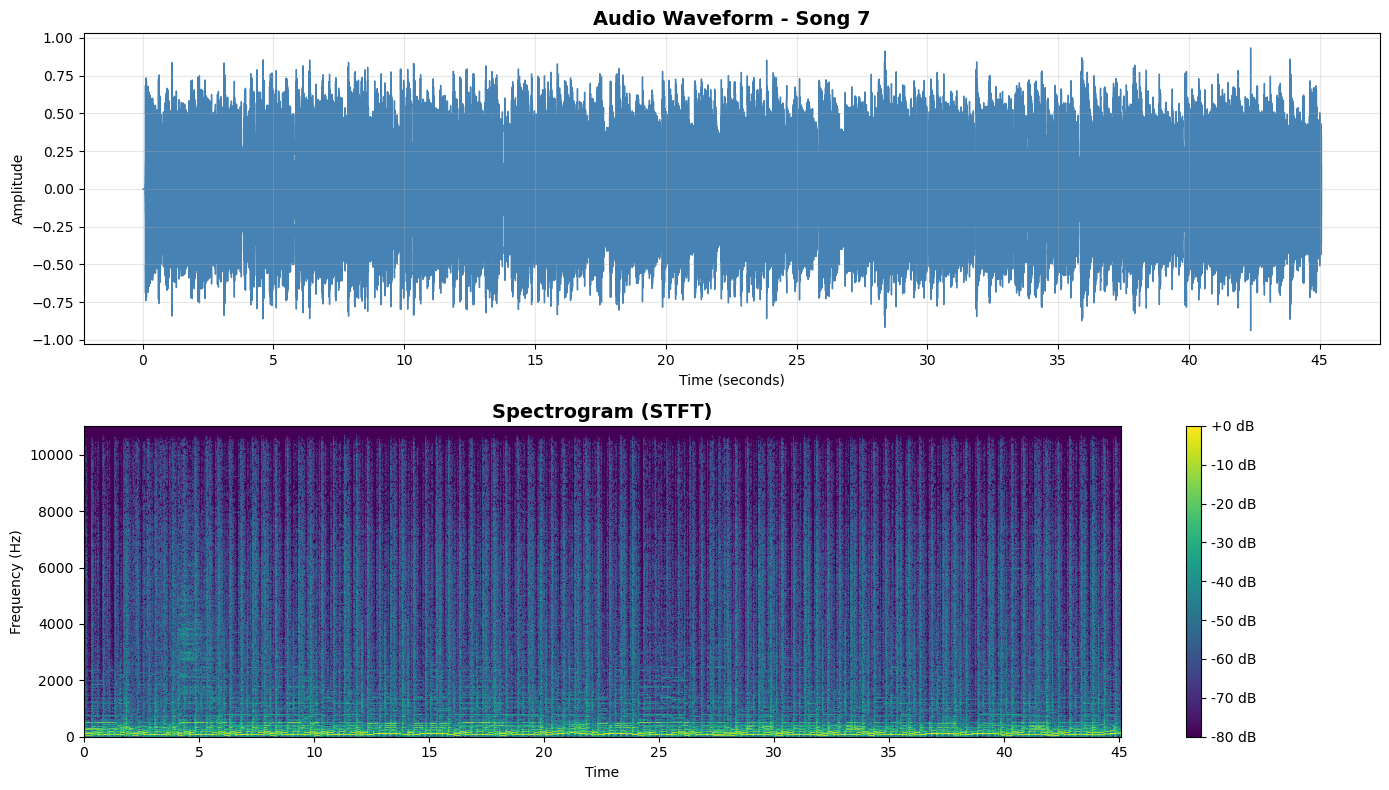

✅ Visualization complete for Song 7!


In [8]:
# ========================================
# 🎵 AUDIO LOADING AND VISUALIZATION
# Change test_song_id to test different songs
# ========================================

test_song_id = df_songs.index[4]  # ← Change this to any song_id you want to test
audio_path = AUDIO_DIR / f"{test_song_id}.mp3"

print("=" * 60)
print(f"🎵 Loading Audio File: {audio_path.name}")
print("=" * 60)

# Check if the audio file exists
if not audio_path.exists():
    print(f"❌ ERROR: Audio file not found!")
    print(f"   File path: {audio_path}")
    print(f"\n💡 Tip: This song_id ({test_song_id}) exists in annotations but the audio file is missing.")
    print(f"   Available song_ids: {df_songs.index[:20].tolist()}")
    print(f"\n⚠️  Please change test_song_id to one of the available values and run this cell again.")
else:
    # Load audio
    try:
        y, sr = librosa.load(audio_path, sr=22050)
        
        print(f"✅ Audio Loaded Successfully!")
        print(f"   Sample Rate: {sr} Hz")
        print(f"   Audio Length: {len(y)} samples")
        print(f"   Duration: {len(y) / sr:.2f} seconds")
        print(f"   Data Type: {y.dtype}")
        print(f"   Value Range: [{y.min():.3f}, {y.max():.3f}]")
        
        # ========================================
        # 📊 VISUALIZE WAVEFORM AND SPECTROGRAM
        # ========================================
        print(f"\n📊 Generating visualizations for Song {test_song_id}...")
        
        fig, axes = plt.subplots(2, 1, figsize=(14, 8))
        
        # 波形图
        librosa.display.waveshow(y, sr=sr, ax=axes[0], color='steelblue')
        axes[0].set_title(f'Audio Waveform - Song {test_song_id}', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Time (seconds)')
        axes[0].set_ylabel('Amplitude')
        axes[0].grid(alpha=0.3)
        
        # 频谱图
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', ax=axes[1], cmap='viridis')
        axes[1].set_title('Spectrogram (STFT)', fontsize=14, fontweight='bold')
        axes[1].set_ylabel('Frequency (Hz)')
        fig.colorbar(img, ax=axes[1], format='%+2.0f dB')
        
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Visualization complete for Song {test_song_id}!")
        
    except Exception as e:
        print(f"❌ Error loading audio: {e}")
        print(f"\n💡 Try another song_id from the available list.")


## 7. 读取该歌曲的情感标注


In [9]:
# 获取该歌曲的标注
# Since song_id is now the index, use .loc to access it
if test_song_id in df_songs.index:
    song_annotation = df_songs.loc[test_song_id]
    
    print("=" * 60)
    print(f"Emotion Annotations for Song {test_song_id}")
    print("=" * 60)
    print(f"Valence:")
    print(f"  Mean: {song_annotation['valence_mean']:.2f}")
    print(f"  Std: {song_annotation['valence_std']:.2f}")
    print(f"\nArousal:")
    print(f"  Mean: {song_annotation['arousal_mean']:.2f}")
    print(f"  Std: {song_annotation['arousal_std']:.2f}")
    
    # 情感分类
    v = song_annotation['valence_mean']
    a = song_annotation['arousal_mean']
    
    if v >= 5 and a >= 5:
        emotion = "Happy/Excited"
    elif v < 5 and a >= 5:
        emotion = "Angry/Tense"
    elif v < 5 and a < 5:
        emotion = "Sad/Depressed"
    else:
        emotion = "Calm/Relaxed"
    
    print(f"\nEmotion Category: {emotion}")
else:
    print(f"Annotation not found for Song {test_song_id}")


Emotion Annotations for Song 7
Valence:
  Mean: 5.80
  Std: 1.47

Arousal:
  Mean: 6.40
  Std: 1.69

Emotion Category: Happy/Excited


## 8. 读取秒级动态标注 (Optional)


In [10]:
# Load dynamic (per-second) annotations
dynamic_dir = ANNOTATION_DIR / "annotations averaged per song" / "dynamic (per second annotations)"

arousal_dynamic = pd.read_csv(dynamic_dir / "arousal.csv")
valence_dynamic = pd.read_csv(dynamic_dir / "valence.csv")

# Set song_id as index for easier access
arousal_dynamic = arousal_dynamic.set_index('song_id')
valence_dynamic = valence_dynamic.set_index('song_id')

print(f"Dynamic Arousal Data Shape: {arousal_dynamic.shape}")
print(f"Dynamic Valence Data Shape: {valence_dynamic.shape}")
print(f"   Each row = one song's time series")
print(f"   Each column = one time point (0.5s intervals)")

# Check if this song has dynamic annotations
print(f"\n🔍 Checking for song {test_song_id}:")

if test_song_id in arousal_dynamic.index and test_song_id in valence_dynamic.index:
    arousal_series = arousal_dynamic.loc[test_song_id].dropna()
    valence_series = valence_dynamic.loc[test_song_id].dropna()
    
    print(f"   ✅ Found in arousal: {len(arousal_series)} time points")
    print(f"   ✅ Found in valence: {len(valence_series)} time points")
    print(f"\n✅ Song {test_song_id} has dynamic annotations!")
    print(f"   Duration covered: ~{len(arousal_series) * 0.5:.1f} seconds")
    
    # Show a preview
    print(f"\n📊 First 5 time points:")
    print(f"   Arousal: {arousal_series.head().values}")
    print(f"   Valence: {valence_series.head().values}")
else:
    print(f"   ❌ Song {test_song_id} not found in dynamic annotations")
    print(f"\n⚠️  Available songs: {arousal_dynamic.index[:20].tolist()}")


Dynamic Arousal Data Shape: (1802, 1224)
Dynamic Valence Data Shape: (1802, 1223)
   Each row = one song's time series
   Each column = one time point (0.5s intervals)

🔍 Checking for song 7:
   ✅ Found in arousal: 60 time points
   ✅ Found in valence: 60 time points

✅ Song 7 has dynamic annotations!
   Duration covered: ~30.0 seconds

📊 First 5 time points:
   Arousal: [0.4642337 0.4607887 0.4609907 0.4610457 0.4572397]
   Valence: [0.3428158 0.3451928 0.3320228 0.3288869 0.3276032]


## 9. 加载秒级动态标注


In [11]:
# 读取秒级标注
dynamic_dir = ANNOTATION_DIR / "annotations averaged per song" / "dynamic (per second annotations)"

arousal_dynamic = pd.read_csv(dynamic_dir / "arousal.csv")
valence_dynamic = pd.read_csv(dynamic_dir / "valence.csv")

print("=" * 60)
print("秒级动态标注")
print("=" * 60)
print(f"Arousal数据形状: {arousal_dynamic.shape}")
print(f"Valence数据形状: {valence_dynamic.shape}")
print(f"\nArousal列名: {list(arousal_dynamic.columns[:10])}...")
print(f"\n前5行Arousal数据:")
arousal_dynamic.head()


秒级动态标注
Arousal数据形状: (1802, 1225)
Valence数据形状: (1802, 1224)

Arousal列名: ['song_id', 'sample_15000ms', 'sample_15500ms', 'sample_16000ms', 'sample_16500ms', 'sample_17000ms', 'sample_17500ms', 'sample_18000ms', 'sample_18500ms', 'sample_19000ms']...

前5行Arousal数据:


,song_id,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,...,sample_622000ms,sample_622500ms,sample_623000ms,sample_623500ms,sample_624000ms,sample_624500ms,sample_625000ms,sample_625500ms,sample_626000ms,sample_626500ms
0,2,-0.109386,-0.114942,-0.116413,-0.118613,-0.126457,-0.133199,-0.136855,-0.144713,-0.138985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,-0.110846,-0.123973,-0.131103,-0.135956,-0.140775,-0.144664,-0.163118,-0.165218,-0.158858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0.222327,0.179446,0.178388,0.184056,0.176042,0.178720,0.176345,0.175793,0.176154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,-0.255613,-0.251579,-0.251958,-0.251124,-0.250763,-0.251957,-0.251957,-0.251957,-0.251957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,0.464234,0.460789,0.460991,0.461046,0.457240,0.465702,0.471809,0.469918,0.473377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 10. 可视化秒级情感变化


✅ Found 60 time points for Song 7
   Annotation time range: 15.0s - 44.5s (in audio)
   Duration: 30.0 seconds


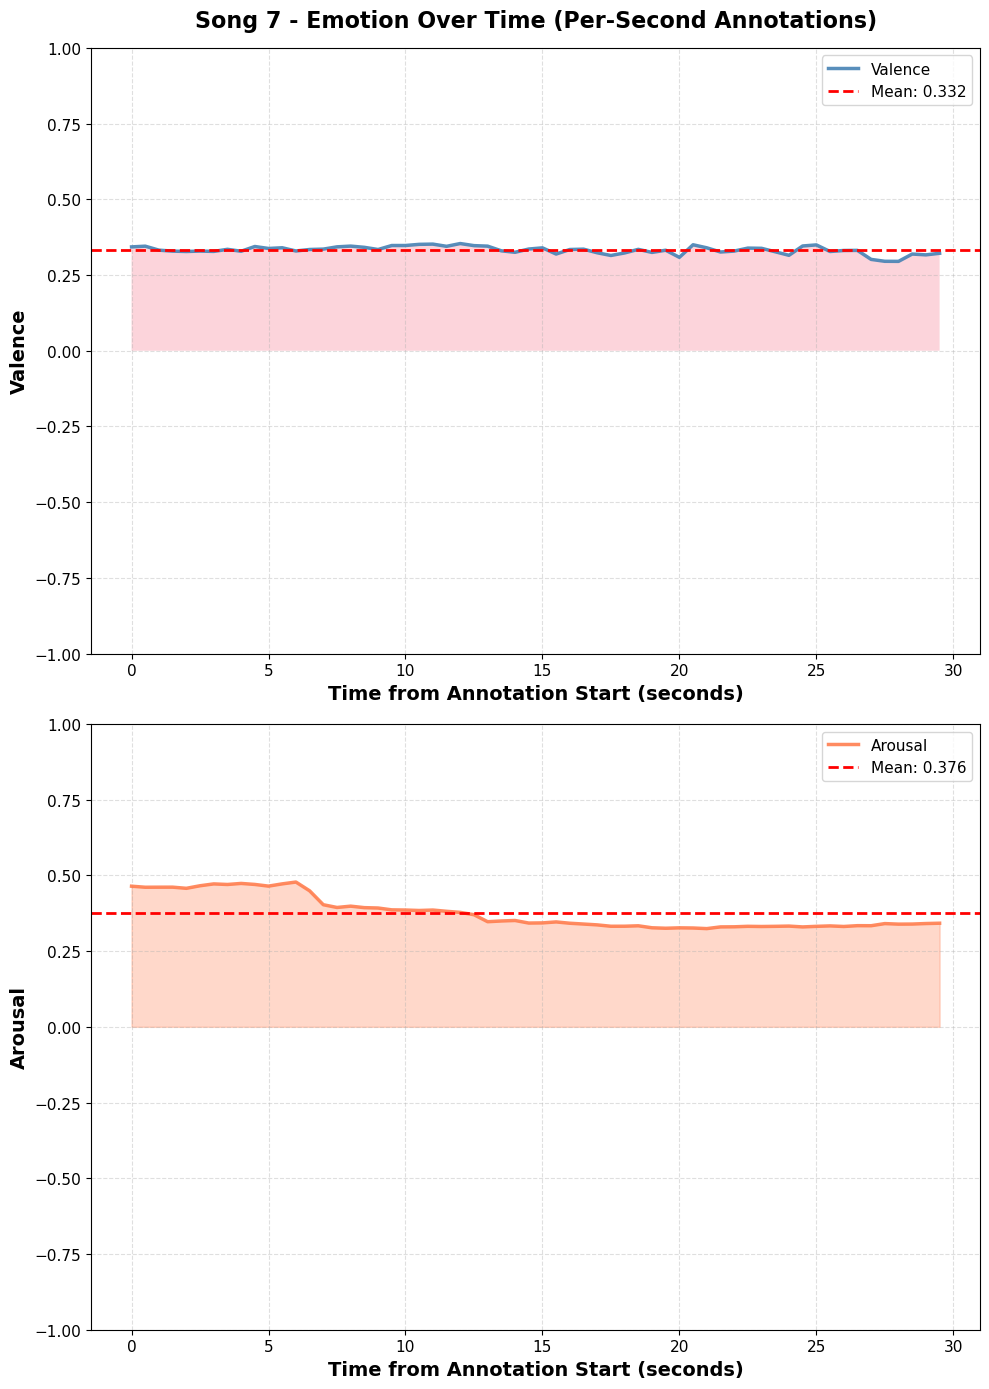


Valence Range: [0.30, 0.35]
Arousal Range: [0.32, 0.48]


In [12]:
# Get this song's per-second annotations
# Need to set song_id as index first (since Cell 20 reloaded the data)
arousal_dynamic_indexed = arousal_dynamic.set_index('song_id')
valence_dynamic_indexed = valence_dynamic.set_index('song_id')

if test_song_id in arousal_dynamic_indexed.index and test_song_id in valence_dynamic_indexed.index:
    # Get time series for this song
    arousal_time_series = arousal_dynamic_indexed.loc[test_song_id].dropna()
    valence_time_series = valence_dynamic_indexed.loc[test_song_id].dropna()
    
    # Time points (in seconds)
    # Note: DEAM dataset annotations start from 15s, we show relative time from annotation start
    time_seconds_relative = np.arange(len(arousal_time_series)) * 0.5  # Start from 0
    time_seconds_absolute = time_seconds_relative + 15  # Absolute time in audio
    
    print(f"✅ Found {len(arousal_time_series)} time points for Song {test_song_id}")
    print(f"   Annotation time range: 15.0s - {time_seconds_absolute[-1]:.1f}s (in audio)")
    print(f"   Duration: {len(arousal_time_series) * 0.5:.1f} seconds")
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 14))
    
    # Valence time series
    axes[0].plot(time_seconds_relative, valence_time_series, color='steelblue', linewidth=2.5, label='Valence', alpha=0.9)
    axes[0].axhline(y=valence_time_series.mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {valence_time_series.mean():.3f}')
    axes[0].fill_between(time_seconds_relative, valence_time_series, alpha=0.3)
    axes[0].set_xlabel('Time from Annotation Start (seconds)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Valence', fontsize=14, fontweight='bold')
    axes[0].set_title(f'Song {test_song_id} - Emotion Over Time (Per-Second Annotations)', 
                      fontsize=16, fontweight='bold', pad=15)
    axes[0].legend(fontsize=11, loc='upper right')
    axes[0].grid(True, alpha=0.4, linestyle='--')
    axes[0].set_ylim(-1, 1)
    axes[0].tick_params(axis='both', labelsize=11)
    # Add more Y-axis ticks for better readability
    axes[0].set_yticks(np.arange(-1, 1.1, 0.25))
    
    # Arousal time series
    axes[1].plot(time_seconds_relative, arousal_time_series, color='coral', linewidth=2.5, label='Arousal', alpha=0.9)
    axes[1].axhline(y=arousal_time_series.mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {arousal_time_series.mean():.3f}')
    axes[1].fill_between(time_seconds_relative, arousal_time_series, alpha=0.3, color='coral')
    axes[1].set_xlabel('Time from Annotation Start (seconds)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Arousal', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11, loc='upper right')
    axes[1].grid(True, alpha=0.4, linestyle='--')
    axes[1].set_ylim(-1, 1)
    axes[1].tick_params(axis='both', labelsize=11)
    # Add more Y-axis ticks
    axes[1].set_yticks(np.arange(-1, 1.1, 0.25))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nValence Range: [{valence_time_series.min():.2f}, {valence_time_series.max():.2f}]")
    print(f"Arousal Range: [{arousal_time_series.min():.2f}, {arousal_time_series.max():.2f}]")
else:
    print(f"❌ Per-second annotations not found for Song {test_song_id}")


## 11. 测试多个样本


In [13]:
# 随机选择几个样本进行加载测试
import random
random.seed(42)

test_samples = random.sample(range(1, 1803), 5)

print("=" * 60)
print("批量加载测试")
print("=" * 60)

results = []
for song_id in test_samples:
    try:
        audio_file = AUDIO_DIR / f"{song_id}.mp3"
        y_test, sr_test = librosa.load(audio_file, sr=22050)
        duration = len(y_test) / sr_test
        
        # 获取标注 (song_id is now the index)
        if song_id in df_songs.index:
            annotation = df_songs.loc[song_id]
            v = annotation['valence_mean']
            a = annotation['arousal_mean']
        else:
            v, a = None, None
        
        results.append({
            'song_id': song_id,
            'duration': duration,
            'valence': v,
            'arousal': a,
            'status': '✅'
        })
        print(f"✅ Song {song_id}: {duration:.1f}s, V={v:.2f}, A={a:.2f}")
    except Exception as e:
        results.append({
            'song_id': song_id,
            'duration': None,
            'valence': None,
            'arousal': None,
            'status': f'❌ {str(e)}'
        })
        print(f"❌ Song {song_id}: 加载失败 - {e}")

# 转换为DataFrame
results_df = pd.DataFrame(results)
print(f"\n成功率: {len(results_df[results_df['status']=='✅'])}/{len(results_df)}")


批量加载测试
✅ Song 1310: 45.0s, V=5.10, A=4.40
✅ Song 229: 45.1s, V=4.80, A=4.80
✅ Song 52: 45.1s, V=4.60, A=5.10
✅ Song 1519: 45.0s, V=5.00, A=5.60
✅ Song 564: 45.1s, V=4.70, A=4.90

成功率: 5/5


## 12. 总结和下一步


In [14]:
print("=" * 70)
print("✅ DEAM数据集加载测试总结")
print("=" * 70)

print("\n数据集统计:")
print(f"  • 总歌曲数: {len(df_songs)}")
print(f"  • 音频文件: {len(list(AUDIO_DIR.glob('*.mp3')))}")
print(f"  • Valence范围: [{df_songs['valence_mean'].min():.2f}, {df_songs['valence_mean'].max():.2f}]")
print(f"  • Arousal范围: [{df_songs['arousal_mean'].min():.2f}, {df_songs['arousal_mean'].max():.2f}]")

print("\n已验证功能:")
print("  ✅ 音频文件加载")
print("  ✅ 歌曲级别标注读取")
print("  ✅ 秒级动态标注读取")
print("  ✅ 波形可视化")
print("  ✅ 频谱图可视化")
print("  ✅ Valence-Arousal分布可视化")
print("  ✅ 时间序列可视化")

print("\n下一步 (Week 2):")
print("  → 提取传统音频特征 (MFCC, Chroma, Spectral)")
print("  → 实现数据加载器类")
print("  → 创建数据集划分 (训练/验证/测试)")
print("  → 训练基线回归模型")

print("\n" + "=" * 70)
print("🎉 Week 1 数据准备任务完成！")
print("=" * 70)


✅ DEAM数据集加载测试总结

数据集统计:
  • 总歌曲数: 1802
  • 音频文件: 1802
  • Valence范围: [1.60, 8.40]
  • Arousal范围: [1.60, 8.10]

已验证功能:
  ✅ 音频文件加载
  ✅ 歌曲级别标注读取
  ✅ 秒级动态标注读取
  ✅ 波形可视化
  ✅ 频谱图可视化
  ✅ Valence-Arousal分布可视化
  ✅ 时间序列可视化

下一步 (Week 2):
  → 提取传统音频特征 (MFCC, Chroma, Spectral)
  → 实现数据加载器类
  → 创建数据集划分 (训练/验证/测试)
  → 训练基线回归模型

🎉 Week 1 数据准备任务完成！
